In [1]:
%config Completer.use_jedi = False

In [19]:
import pandas as pd
from tqdm.notebook import tqdm
import re
from typing import List
import os
import matplotlib.pyplot as plt

In [24]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
    vector_size=100,
    window=10, 
    min_count=2,
    sg=0,
    workers=1,
    seed=42
)

In [25]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = []
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [26]:
docs = load_docs('clean_txt')

In [27]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

### Word2Vec модель

In [28]:
%%time
model_w2v.epochs = 10

model_w2v.build_vocab(docs_tokenized)

model_w2v.train(docs_tokenized,
                total_examples=model_w2v.corpus_count,
                epochs=model_w2v.epochs)

CPU times: user 2.31 s, sys: 3.63 ms, total: 2.31 s
Wall time: 2.29 s


(1511270, 1641140)

In [29]:
model_w2v.wv.most_similar('convolutional')

[('recurrent', 0.9876729846000671),
 ('connectionist', 0.9597651362419128),
 ('neural', 0.952626645565033),
 ('crnn', 0.9449397921562195),
 ('vkcom', 0.9411120414733887),
 ('stn', 0.9392105340957642),
 ('rnns', 0.9372844696044922),
 ('sdf', 0.936269998550415),
 ('shortterm', 0.9356644153594971),
 ('coexpression', 0.9333829283714294)]

In [32]:
model_w2v.wv.most_similar('lstm')

[('hidden', 0.9640159606933594),
 ('cnn', 0.9523435831069946),
 ('crnn', 0.938872754573822),
 ('ctc', 0.9336230158805847),
 ('convolutional', 0.927346408367157),
 ('forest', 0.9247416853904724),
 ('trained', 0.921256422996521),
 ('layer', 0.9156723022460938),
 ('training', 0.91310054063797),
 ('backpropagation', 0.9014157056808472)]

In [37]:
model_w2v.wv.most_similar('node')

[('slave', 0.9045748114585876),
 ('oversubscription', 0.8913692831993103),
 ('loading', 0.8679844737052917),
 ('suer', 0.8375047445297241),
 ('pai', 0.8204786777496338),
 ('gini', 0.8202564716339111),
 ('blockrow', 0.8190667629241943),
 ('worker', 0.8182411193847656),
 ('multiindex', 0.8141867518424988),
 ('stop', 0.809397280216217)]

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(model, word):
    matrix = cosine_similarity(model.wv[word].reshape(1, -1), model.wv.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')

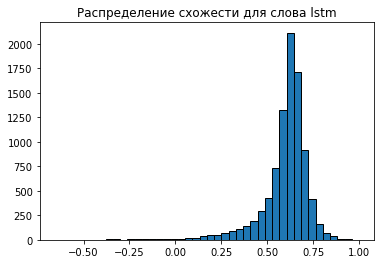

In [31]:
show_similarity_for_single_word(model_w2v, 'lstm')

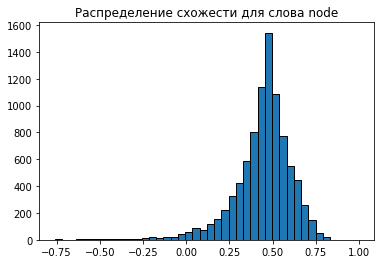

In [36]:
show_similarity_for_single_word(model_w2v, 'node')